In [ ]:
%%capture

!apt install python3-mpi4py cython3 libxc-dev gpaw-data
!pip -q install gpaw
!pip install nglview

In [ ]:
# Paquetes  para  importar 

from ase import Atoms
from ase.visualize.plot import plot_atoms
from gpaw import GPAW,PW,FermiDirac
from math import sqrt
import matplotlib.pyplot as plt

# Convergencia de parámetros

Ahora que tenemos claros los parámetros fundamentales para hacer un calculo con GPAW. Veremos como podemos converger estos parámetros para garantizar un resultado optimo. Lo primero que haremos es centrarnos en dos de los parámetros importantes. El energycutoff, que define el tamaño de la base de ondas planas y el numero de puntos en el espacio reciproco. 

## Tamaño de la base 

El tamaño de la base se define por medio del método PW. Podemos considerar el cambio en el tamaño de la base de la siguiente forma 


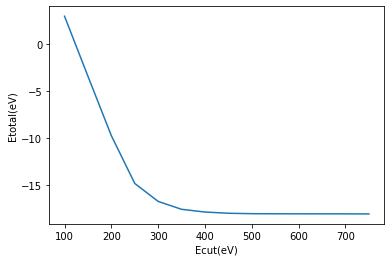

In [ ]:
acc=1.44
st = Atoms('C2',[[0.,0.,7.5],[acc,0.,7.5]], cell=[[1.5*acc,sqrt(3)*acc/2.,0.],[1.5*acc,-sqrt(3)*acc/2.,0.],[0.,0.,15.]],pbc=[True,True,False])


cutoffs = range(100,800,50)
energies = []

for cutoff in cutoffs:
  calc = GPAW(mode=PW(cutoff),
            xc='LDA',
            occupations=FermiDirac(width=0.01),
            kpts={'size': (2, 2, 1), 'gamma': True},
            txt='graphene.log')
  st.set_calculator(calc)
  energies.append(st.get_potential_energy())
plt.xlabel("Ecut(eV)")
plt.ylabel("Etotal(eV)")
plt.plot(cutoffs,energies)

El parámetro de convergencia, es la energía total. En este caso podemos ver que esta se hace mínima para un valor de Ecutoff del orden de $450 eV$. Por lo tanto desde este momento podemos fijar este valor para nuestros cálculos. 

# Numero de Puntos Ks

En este caso debemos considerar la cantidad de puntos Ks, con los que se barre el espacio reciproco. El parámetro para esto en GPAW es 


```python
kpts={'size': (n-vec1,n-vec2,n-vec3), 'gamma': True}
```
es decir dentro del código el número de puntos ks los introducimos por medio de un diccionario donde $n-vecx$ es el numero de puntos que se toman a lo largo de cada una de las direcciones del espacio reciproco. Cuando no se tiene periodicidad a lo largo de una dirección el numero de puntos a lo largo de esa dirección se toma como $1$. El numero de puntos en cada dirección depende directamente del tamaño de la celda unitaria. Si la celda es grande en general el numero de puntos necesarios para converger la energía total es más pequeño. 

A continuación podemos converger los puntos necesarios para el grafeno.




Text(0, 0.5, 'Etotal(eV)')

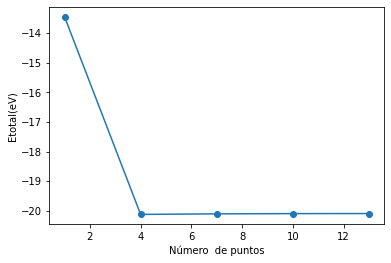

In [ ]:
npts = range(1,15,3)
energies = []

for n in npts:
  calc = GPAW(mode=PW(450),
            xc='LDA',
            occupations=FermiDirac(width=0.01),
            kpts={'size': (n,n, 1), 'gamma': True},
            txt='graphene.log')
  st.set_calculator(calc)
  energies.append(st.get_potential_energy())
plt.plot(npts,energies,marker='o')
plt.xlabel("Número  de puntos")
plt.ylabel("Etotal(eV)")

con lo anterior, podemos definir que con $10$ puntos es a lo largo de los dos vectores del plano es más que suficiente para hacer nuestros cálculos. 

## **Ejercicio:**

Repita el  estudio  de convergencia  anterior,  pero  en lugar del  funcional  de intercambio  y correlación LDA, emplear  PBE.

---

GPAW  tiene  disponible  otros  funcionales  de intercambio  y  correlación.  Puede  consultarlos  en 

[XC GPAW](https://wiki.fysik.dtu.dk/gpaw/documentation/basic.html#manual-xc)

---